In [1]:
# Load Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
weather_data = pd.read_csv('vancouver_weather.csv')

#Preview the dataset
weather_data

,date,max_dew_point_v,max_dew_point_c,max_dew_point_d,max_dew_point_y,max_humidex_v,max_humidex_c,max_humidex_d,max_humidex_y,max_min_temperature_v,...,min_temperature_d,min_temperature_y,min_wind_speed_v,min_wind_speed_c,min_wind_speed_d,min_wind_speed_y,min_windchill_v,min_windchill_c,min_windchill_d,min_windchill_y
0,2024-09-10,17.3,71,1953-09-10 2023-09-10,1995 2007 2020,29.0,17.0,1953-09-10 2023-09-10,2020,15.6,...,1937-09-10 2023-09-10,1964,0,71,1953-09-10 2023-09-10,1958 1959 1960 1963 1964 1965 1966 1967 1969 1...,NaN,NaN,NaN,NaN
1,2024-09-09,18.9,72,1953-09-09 2024-09-09,1963,31.0,13.0,1953-09-09 2021-09-09,1963,16.7,...,1937-09-09 2024-09-09,1945,0,72,1953-09-09 2024-09-09,1955 1957 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
2,2024-09-08,19.0,72,1953-09-08 2024-09-08,1993,30.0,12.0,1963-09-08 2024-09-08,1981,16.6,...,1937-09-08 2024-09-08,1959,0,72,1953-09-08 2024-09-08,1954 1956 1959 1960 1961 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
3,2024-09-07,18.3,72,1953-09-07 2024-09-07,1963 2024,30.0,18.0,1958-09-07 2024-09-07,1993,16.3,...,1937-09-07 2024-09-07,1970,0,72,1953-09-07 2024-09-07,1957 1958 1960 1962 1963 1965 1966 1967 1968 1...,NaN,NaN,NaN,NaN
4,2024-09-06,18.6,72,1953-09-06 2024-09-06,2024,31.0,20.0,1953-09-06 2024-09-06,2017,17.7,...,1937-09-06 2024-09-06,1965,0,72,1953-09-06 2024-09-06,1954 1958 1959 1960 1961 1962 1965 1966 1967 1...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1997-04-30,13.9,45,1953-04-30 1997-04-30,1957,NaN,NaN,NaN,NaN,11.1,...,1937-04-30 1997-04-30,1954,0,45,1953-04-30 1997-04-30,1953 1956 1958 1965 1967 1969 1970 1971 1973 1...,NaN,NaN,NaN,NaN
9996,1997-04-29,13.8,45,1953-04-29 1997-04-29,1992,NaN,NaN,NaN,NaN,10.8,...,1937-04-29 1997-04-29,1975,0,45,1953-04-29 1997-04-29,1954 1955 1956 1958 1963 1967 1968 1970 1972 1...,NaN,NaN,NaN,NaN
9997,1997-04-28,13.6,45,1953-04-28 1997-04-28,1992,NaN,NaN,NaN,NaN,10.6,...,1937-04-28 1997-04-28,1986,0,45,1953-04-28 1997-04-28,1953 1956 1957 1958 1960 1962 1963 1964 1965 1...,NaN,NaN,NaN,NaN
9998,1997-04-27,13.7,45,1953-04-27 1997-04-27,1992,NaN,NaN,NaN,NaN,11.1,...,1937-04-27 1997-04-27,1948,0,45,1953-04-27 1997-04-27,1958 1960 1961 1965 1966 1967 1968 1969 1970 1...,NaN,NaN,NaN,NaN


In [10]:
# Data Cleaning for Time-Series observation
ts_columns = ['date', 'max_dew_point_v', 'max_humidex_v', 'max_temperature_v', 'max_wind_speed_v',
                   'min_dew_point_v', 'min_temperature_v','max_precipitation_v']
ts = weather_data[ts_columns]
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.rename(columns={
    'max_dew_point_v': 'max_dew_point',
    'max_humidex_v': 'max_humidex',
    'max_temperature_v': 'max_temperature',
    'max_wind_speed_v': 'max_wind_speed',
    'min_dew_point_v': 'min_dew_point',
    'min_temperature_v': 'min_temperature',
    'max_precipitation_v':'max_precipitation'
})

# Replace any missing values with the average of that column
cm_data=ts.dropna()
ts_data=ts
ts_data.fillna(ts_data.mean(), inplace=True)

# Preview of dataframe after cleaning
ts_data

/tmp/ipykernel_934/3997533336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['date'] = pd.to_datetime(ts['date'])


,date,max_dew_point,max_humidex,max_temperature,max_wind_speed,min_dew_point,min_temperature,max_precipitation
0,2024-09-10,17.3,29.000000,26.1,48,3.3,5.6,26.4
1,2024-09-09,18.9,31.000000,26.0,65,2.0,6.1,15.8
2,2024-09-08,19.0,30.000000,26.2,63,2.5,6.1,16.8
3,2024-09-07,18.3,30.000000,25.6,48,0.3,6.1,14.2
4,2024-09-06,18.6,31.000000,27.6,43,2.8,6.1,24.2
...,...,...,...,...,...,...,...,...
9995,1997-04-30,13.9,30.477612,23.9,39,-11.1,-0.6,36.1
9996,1997-04-29,13.8,30.477612,23.9,42,-5.0,1.1,39.6
9997,1997-04-28,13.6,30.477612,21.7,42,-3.9,0.8,22.6
9998,1997-04-27,13.7,30.477612,25.0,53,-8.3,-0.6,33.0


# Analysis section

## Time Series visualization by month

We can observe trends of increasingly extreme humidity and temperatures etc. in the plots.

### Max dew point temperature:

We can see an increasing maximum dew point

- The max humidity increases over the years
- An indicator of increased maximum temperature
- Potentially associated with intense "Big Rain" events (Arndt, 2018), especially during the warmer periods.

### Min dew point temperature:

We can see a decreasing minimum dew point

- The min humidity decreases over the years
- An indicator of decreased minimum temperature
- Decreased humidity is an important contributing factor to more wildfire events (National Wildfire Coordinating Group)

### Max temperature 

We can see increased max temperature

### Min temperature

We can see decreased min temperature


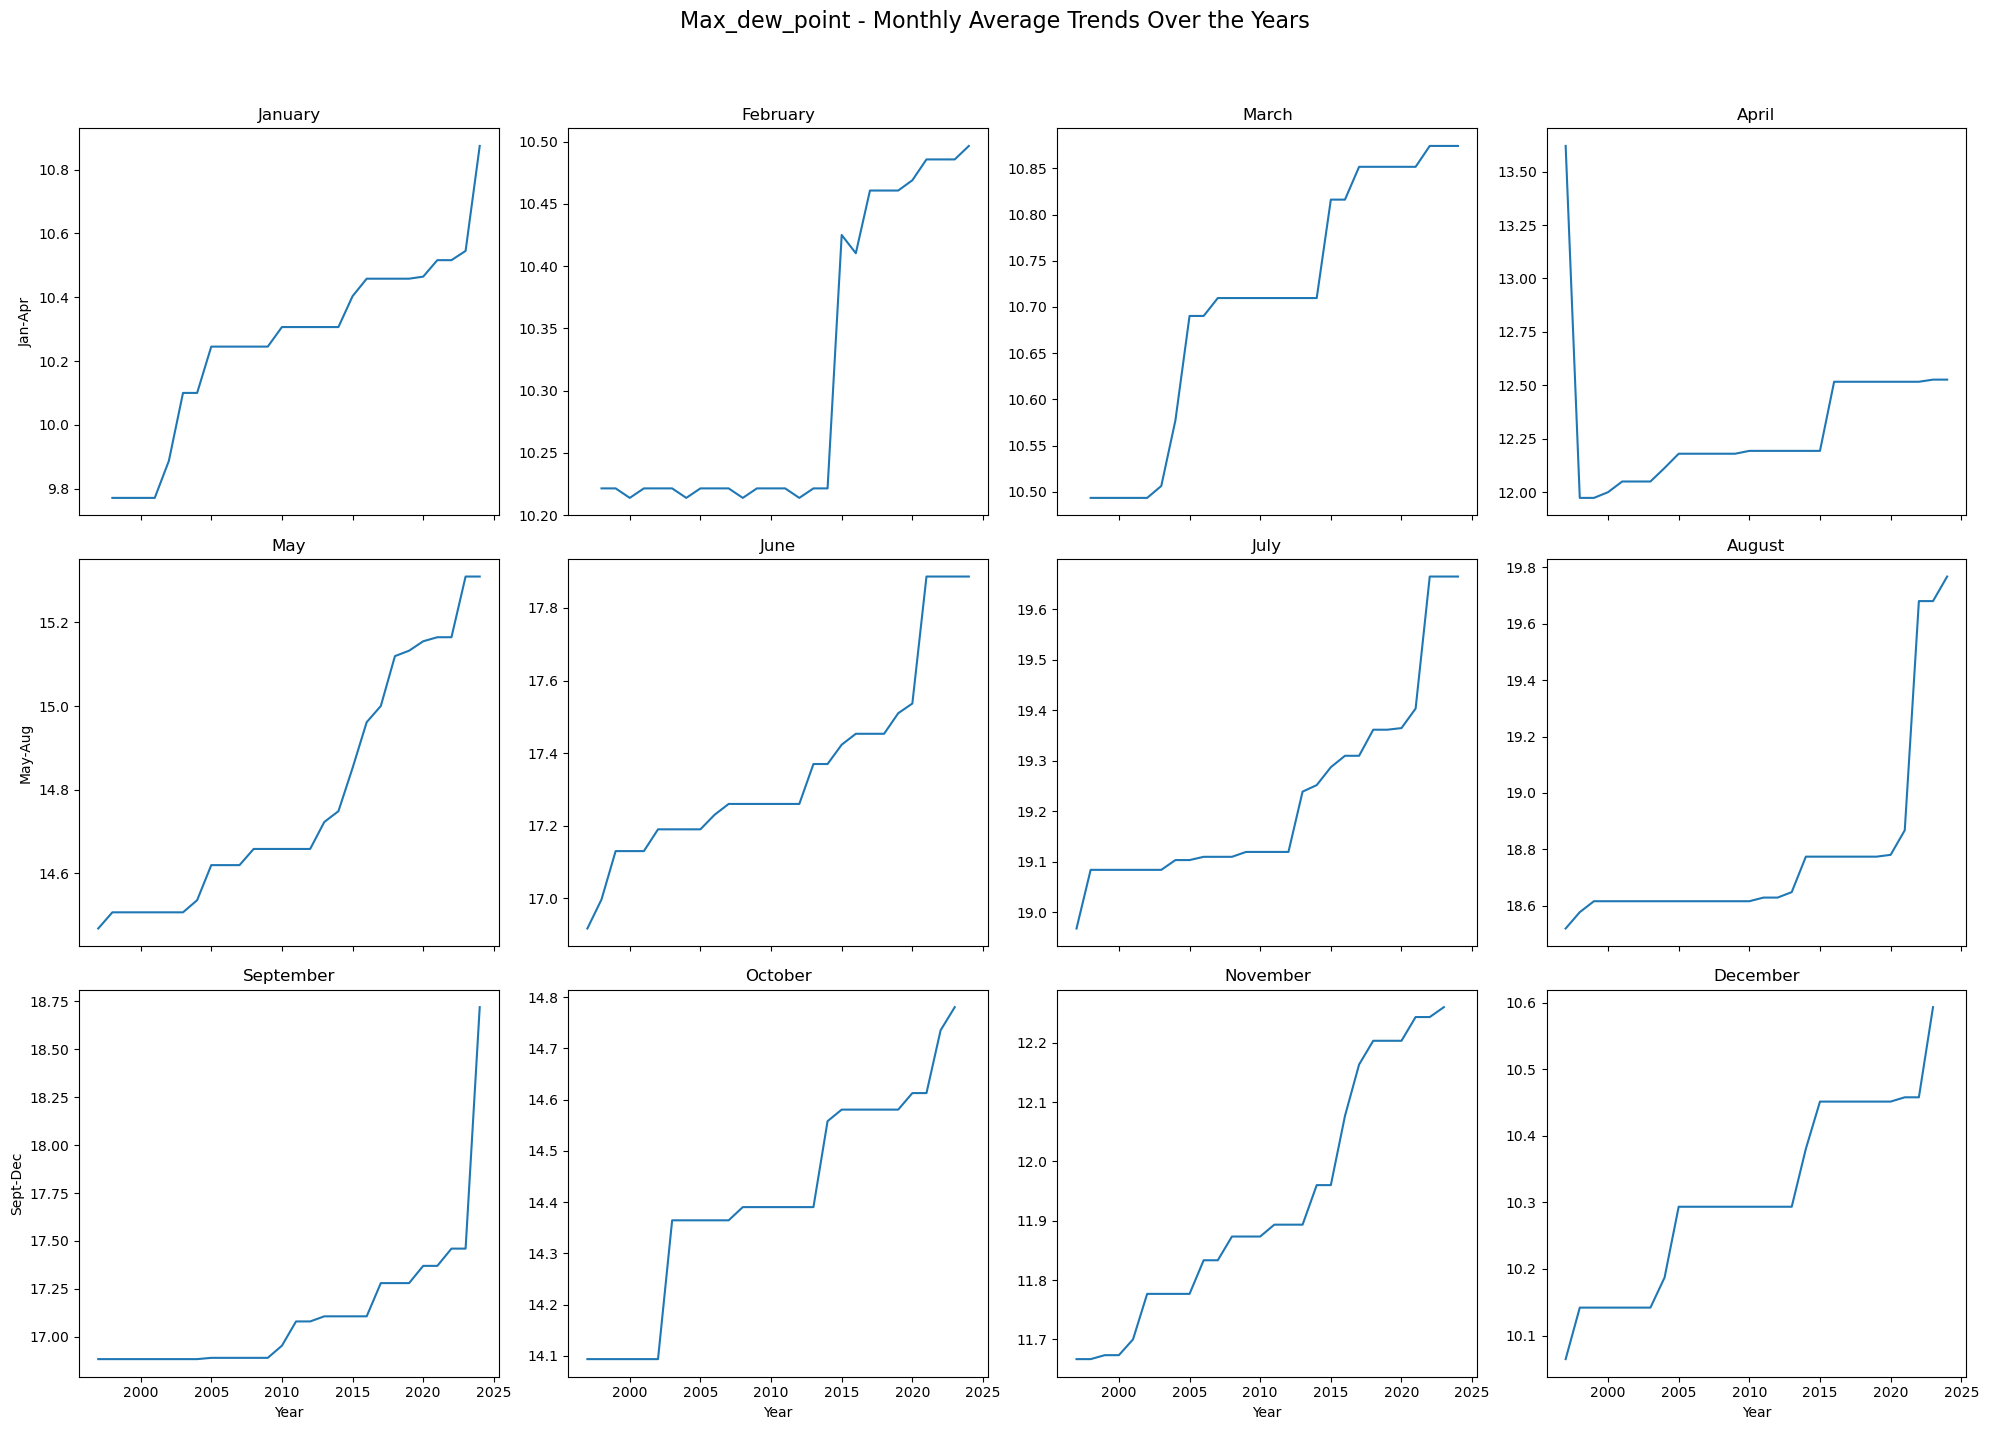

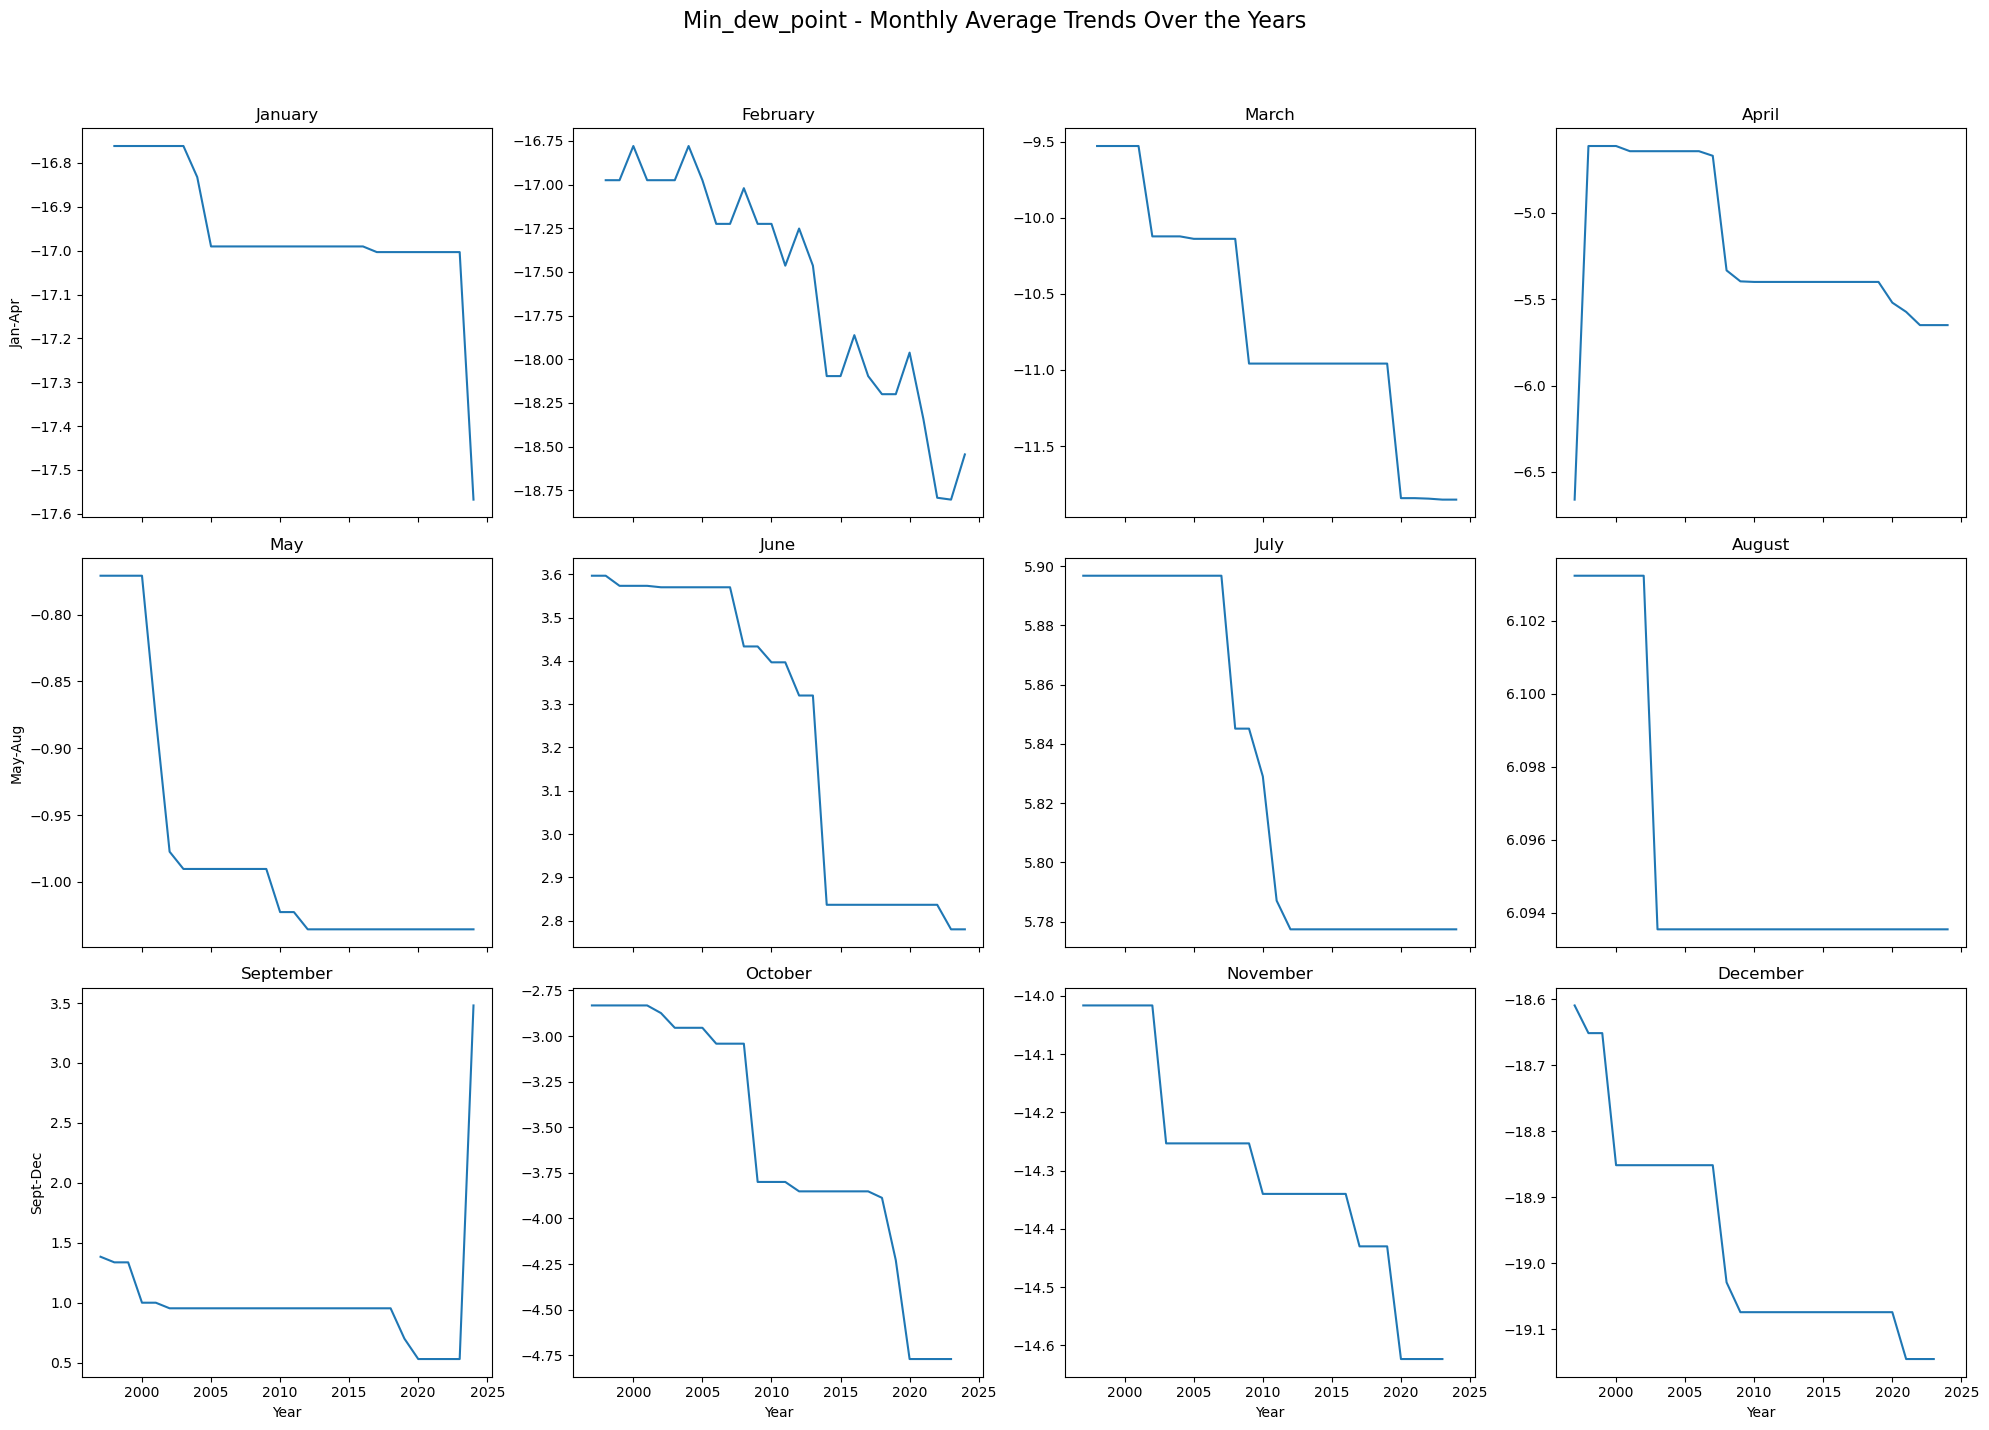

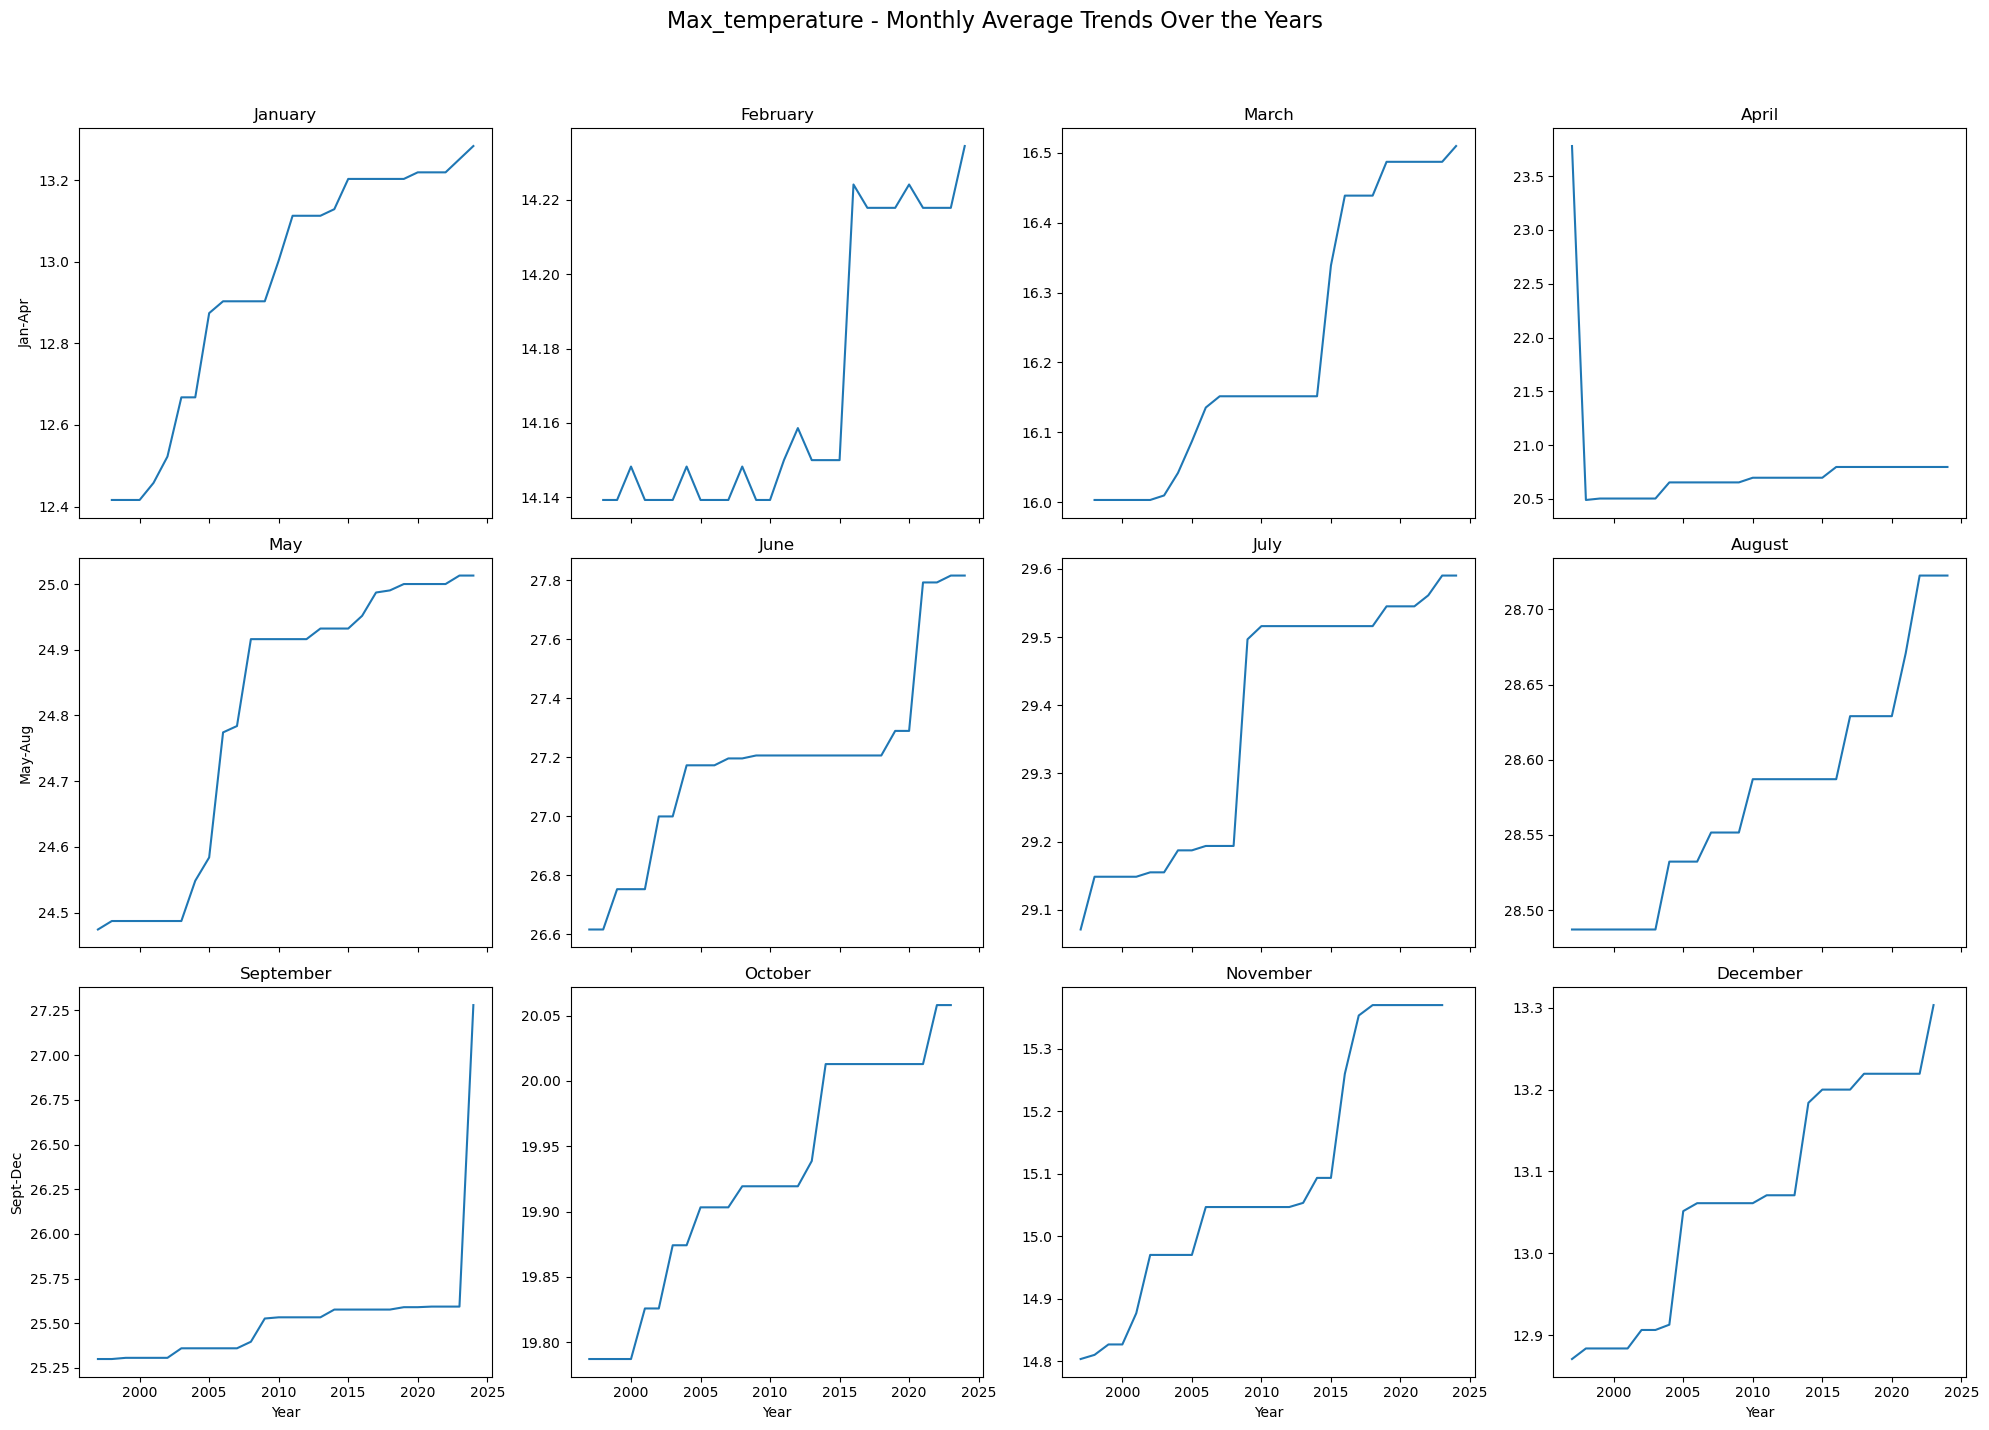

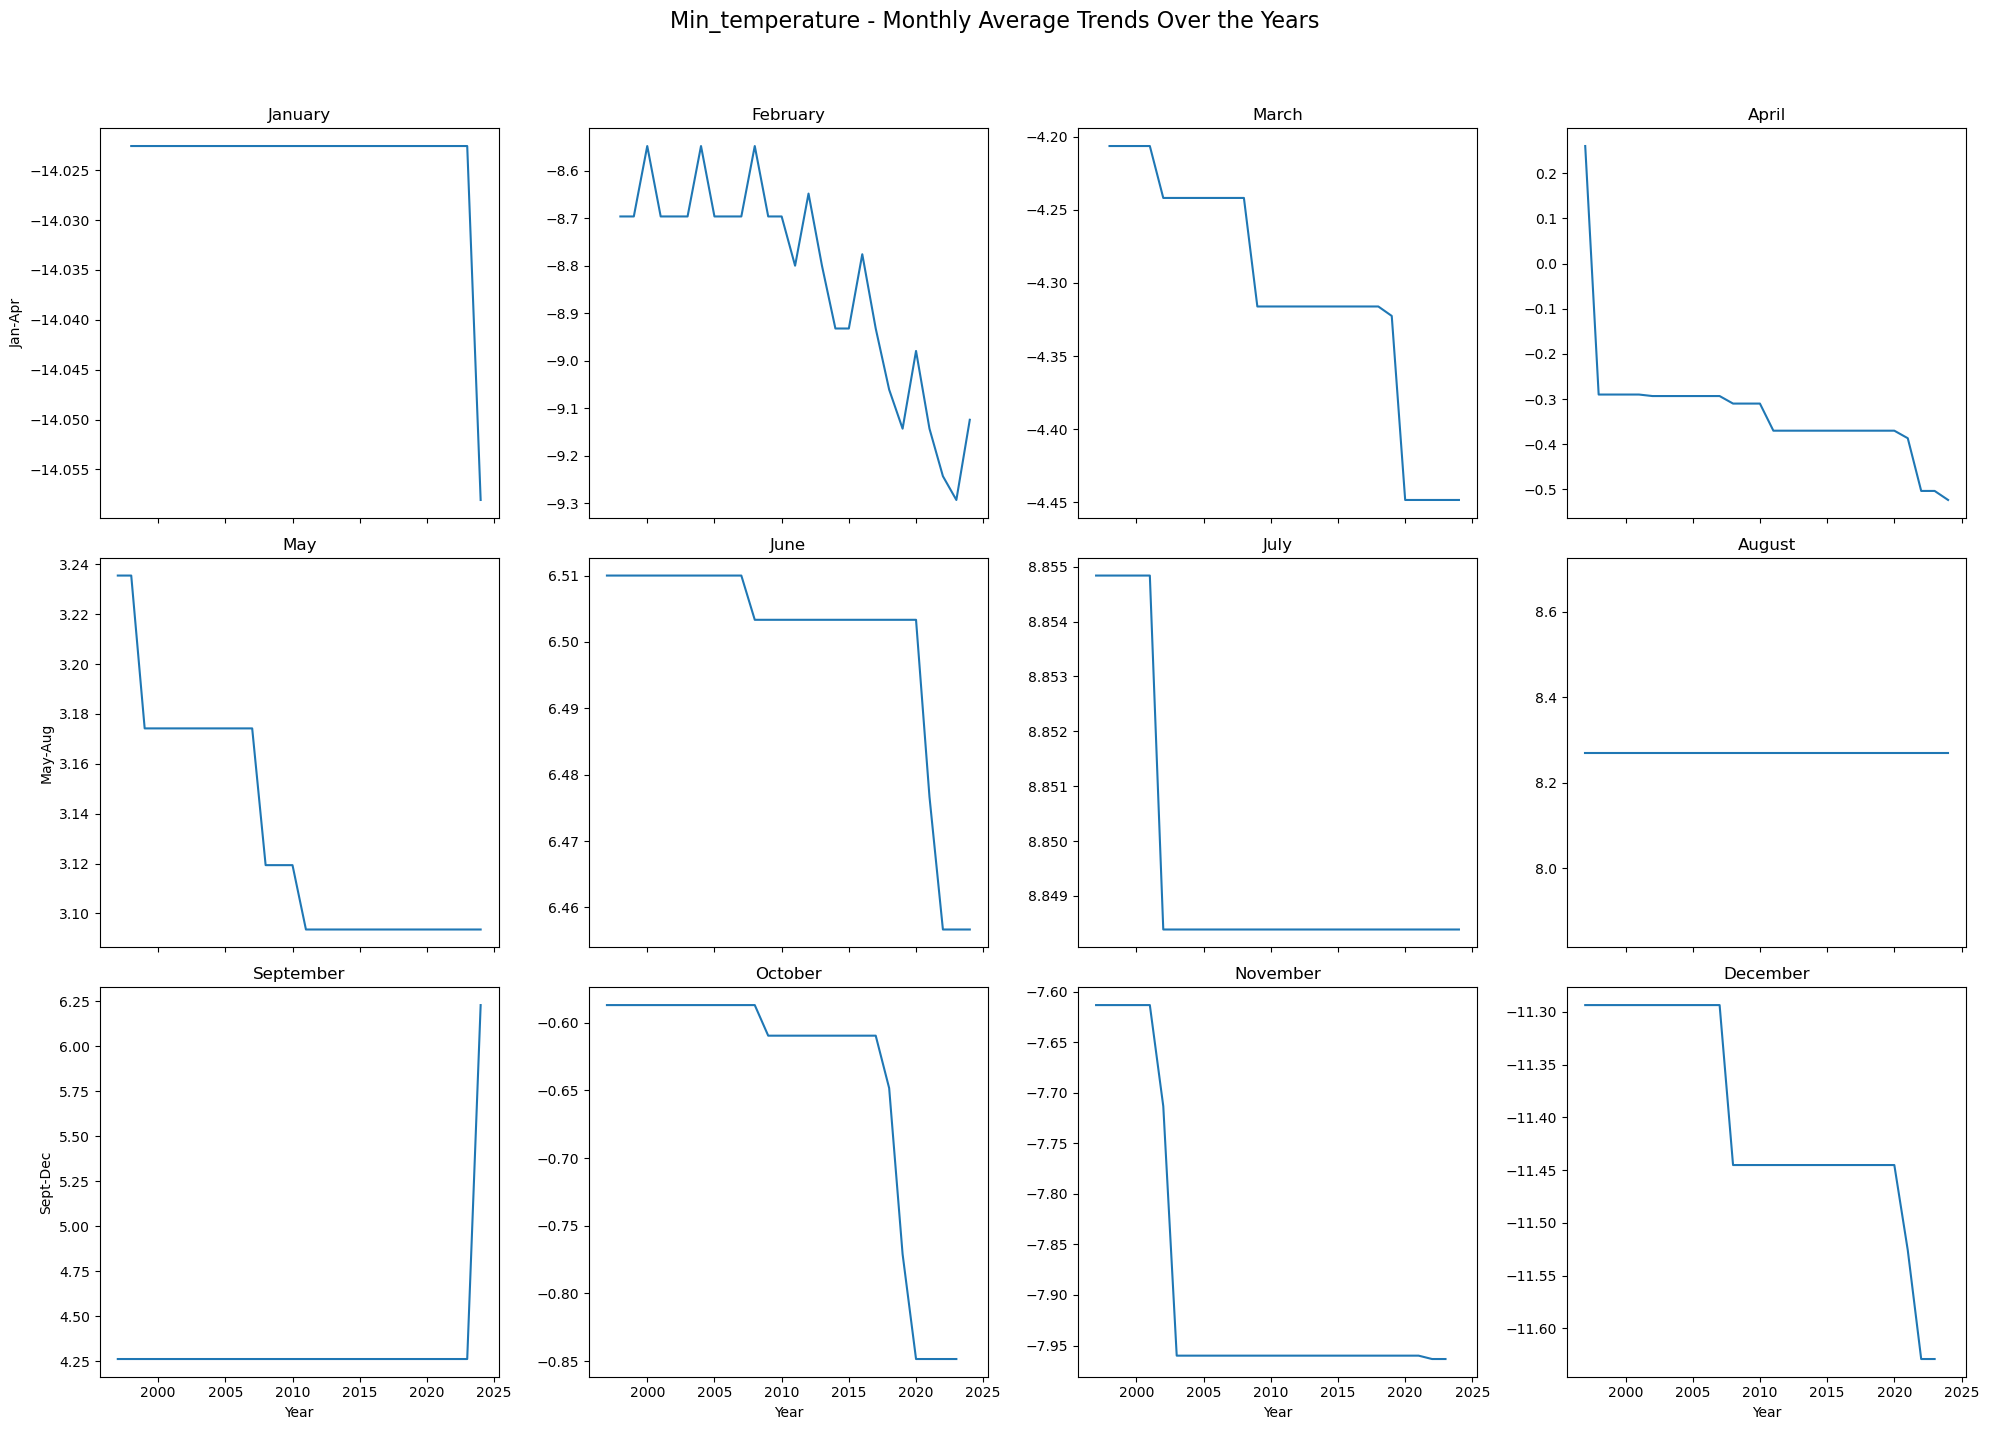

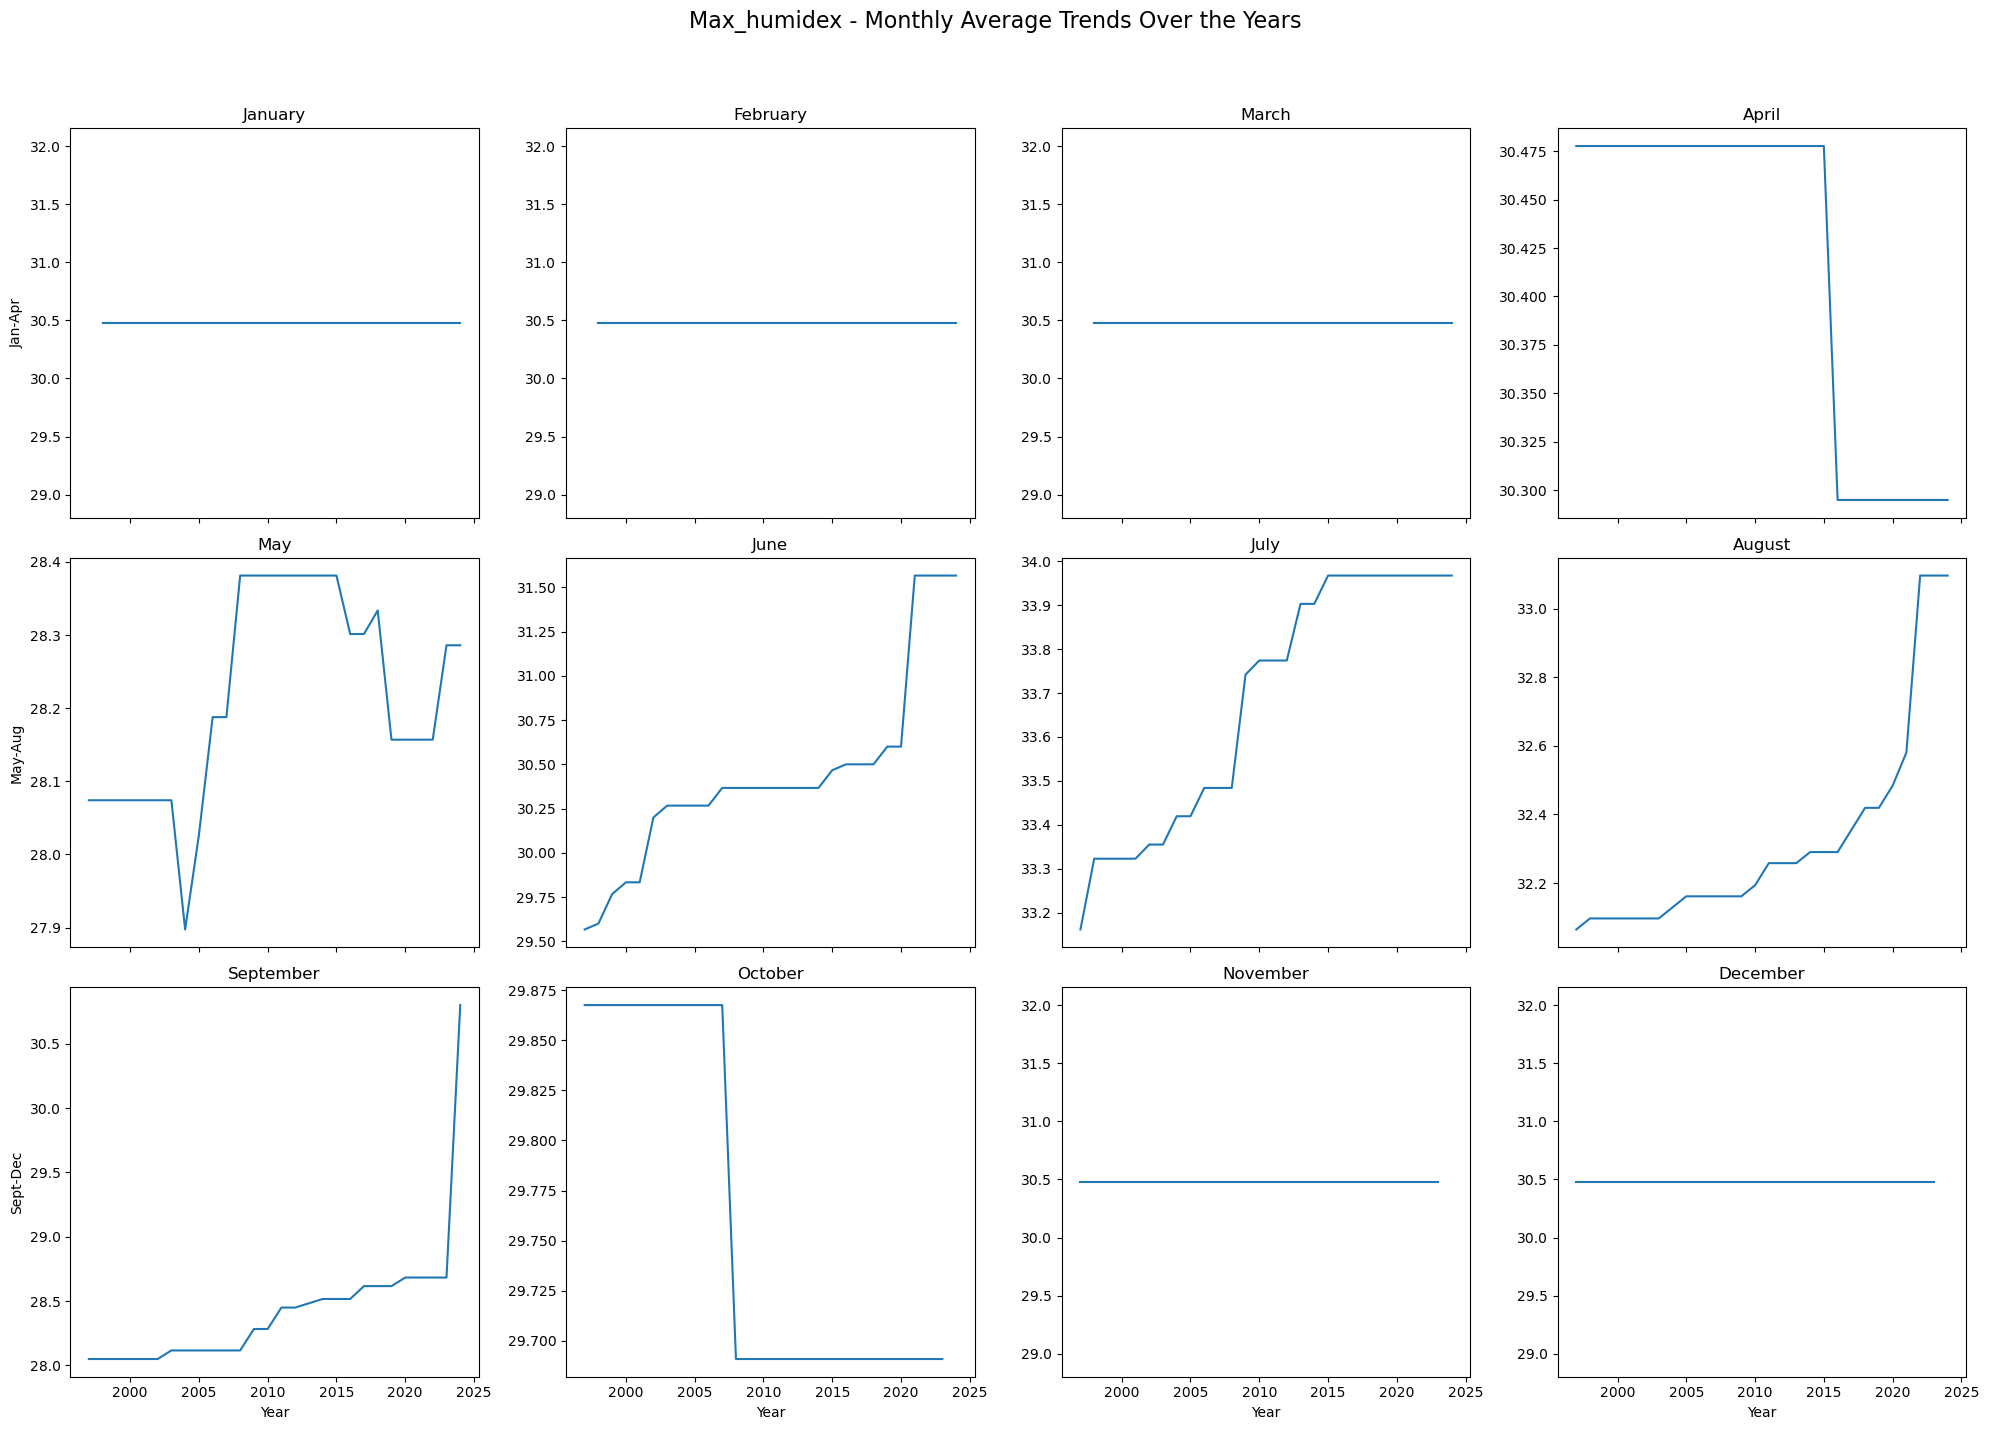

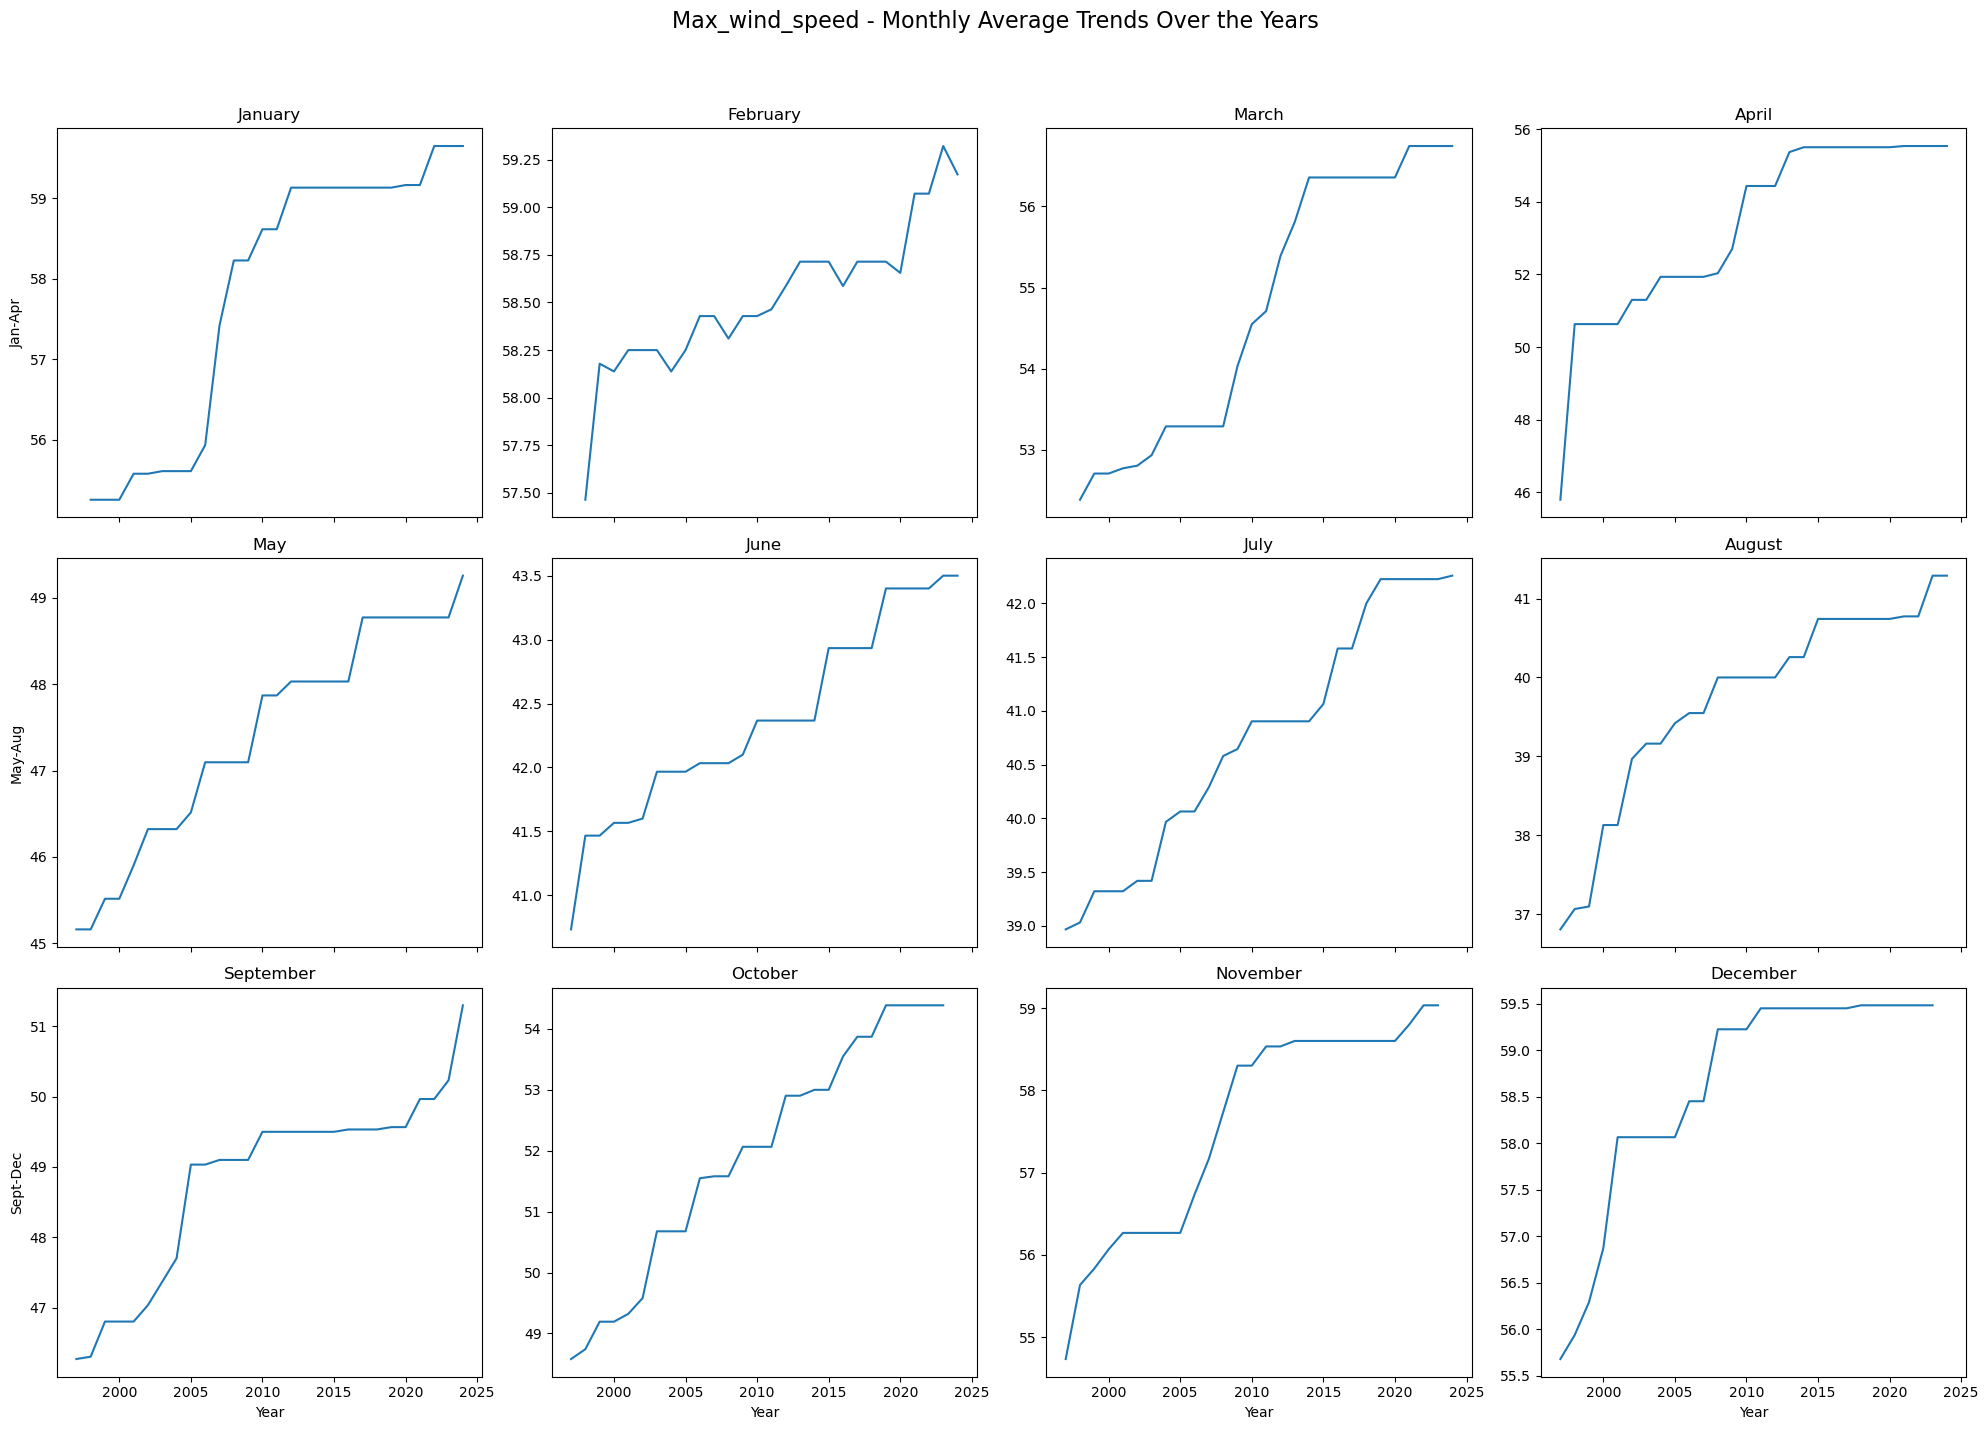

In [4]:
# Extract month and year for grouping
ts_data['month'] = ts_data['date'].dt.month
ts_data['year'] = ts_data['date'].dt.year

variables = ['max_dew_point', 'min_dew_point', 'max_temperature', 'min_temperature','max_humidex','max_wind_speed']

# Compute within-month averages for each variable
monthly_avg = ts_data.groupby(['year', 'month'])[variables].mean().reset_index()

# Time-Series Visualization by Month
month_groups = [(1, 4), (5, 8), (9, 12)]
month_labels = ['Jan-Apr', 'May-Aug', 'Sept-Dec']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, variable in enumerate(variables):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=False)
    fig.suptitle(f'{variable.capitalize()} - Monthly Average Trends Over the Years', fontsize=16)
    
    for row, (start_month, end_month) in enumerate(month_groups):
        for month in range(start_month, end_month + 1):
            ax = axes[row, month - start_month]
            monthly_data = monthly_avg[monthly_avg['month'] == month]
            ax.plot(monthly_data['year'], monthly_data[variable], label=f'{months[month - 1]}')
            ax.set_title(f'{months[month - 1]}')
            if row == 2:
                ax.set_xlabel('Year')
            if month == start_month:
                ax.set_ylabel(month_labels[row])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

## Another version with different variables

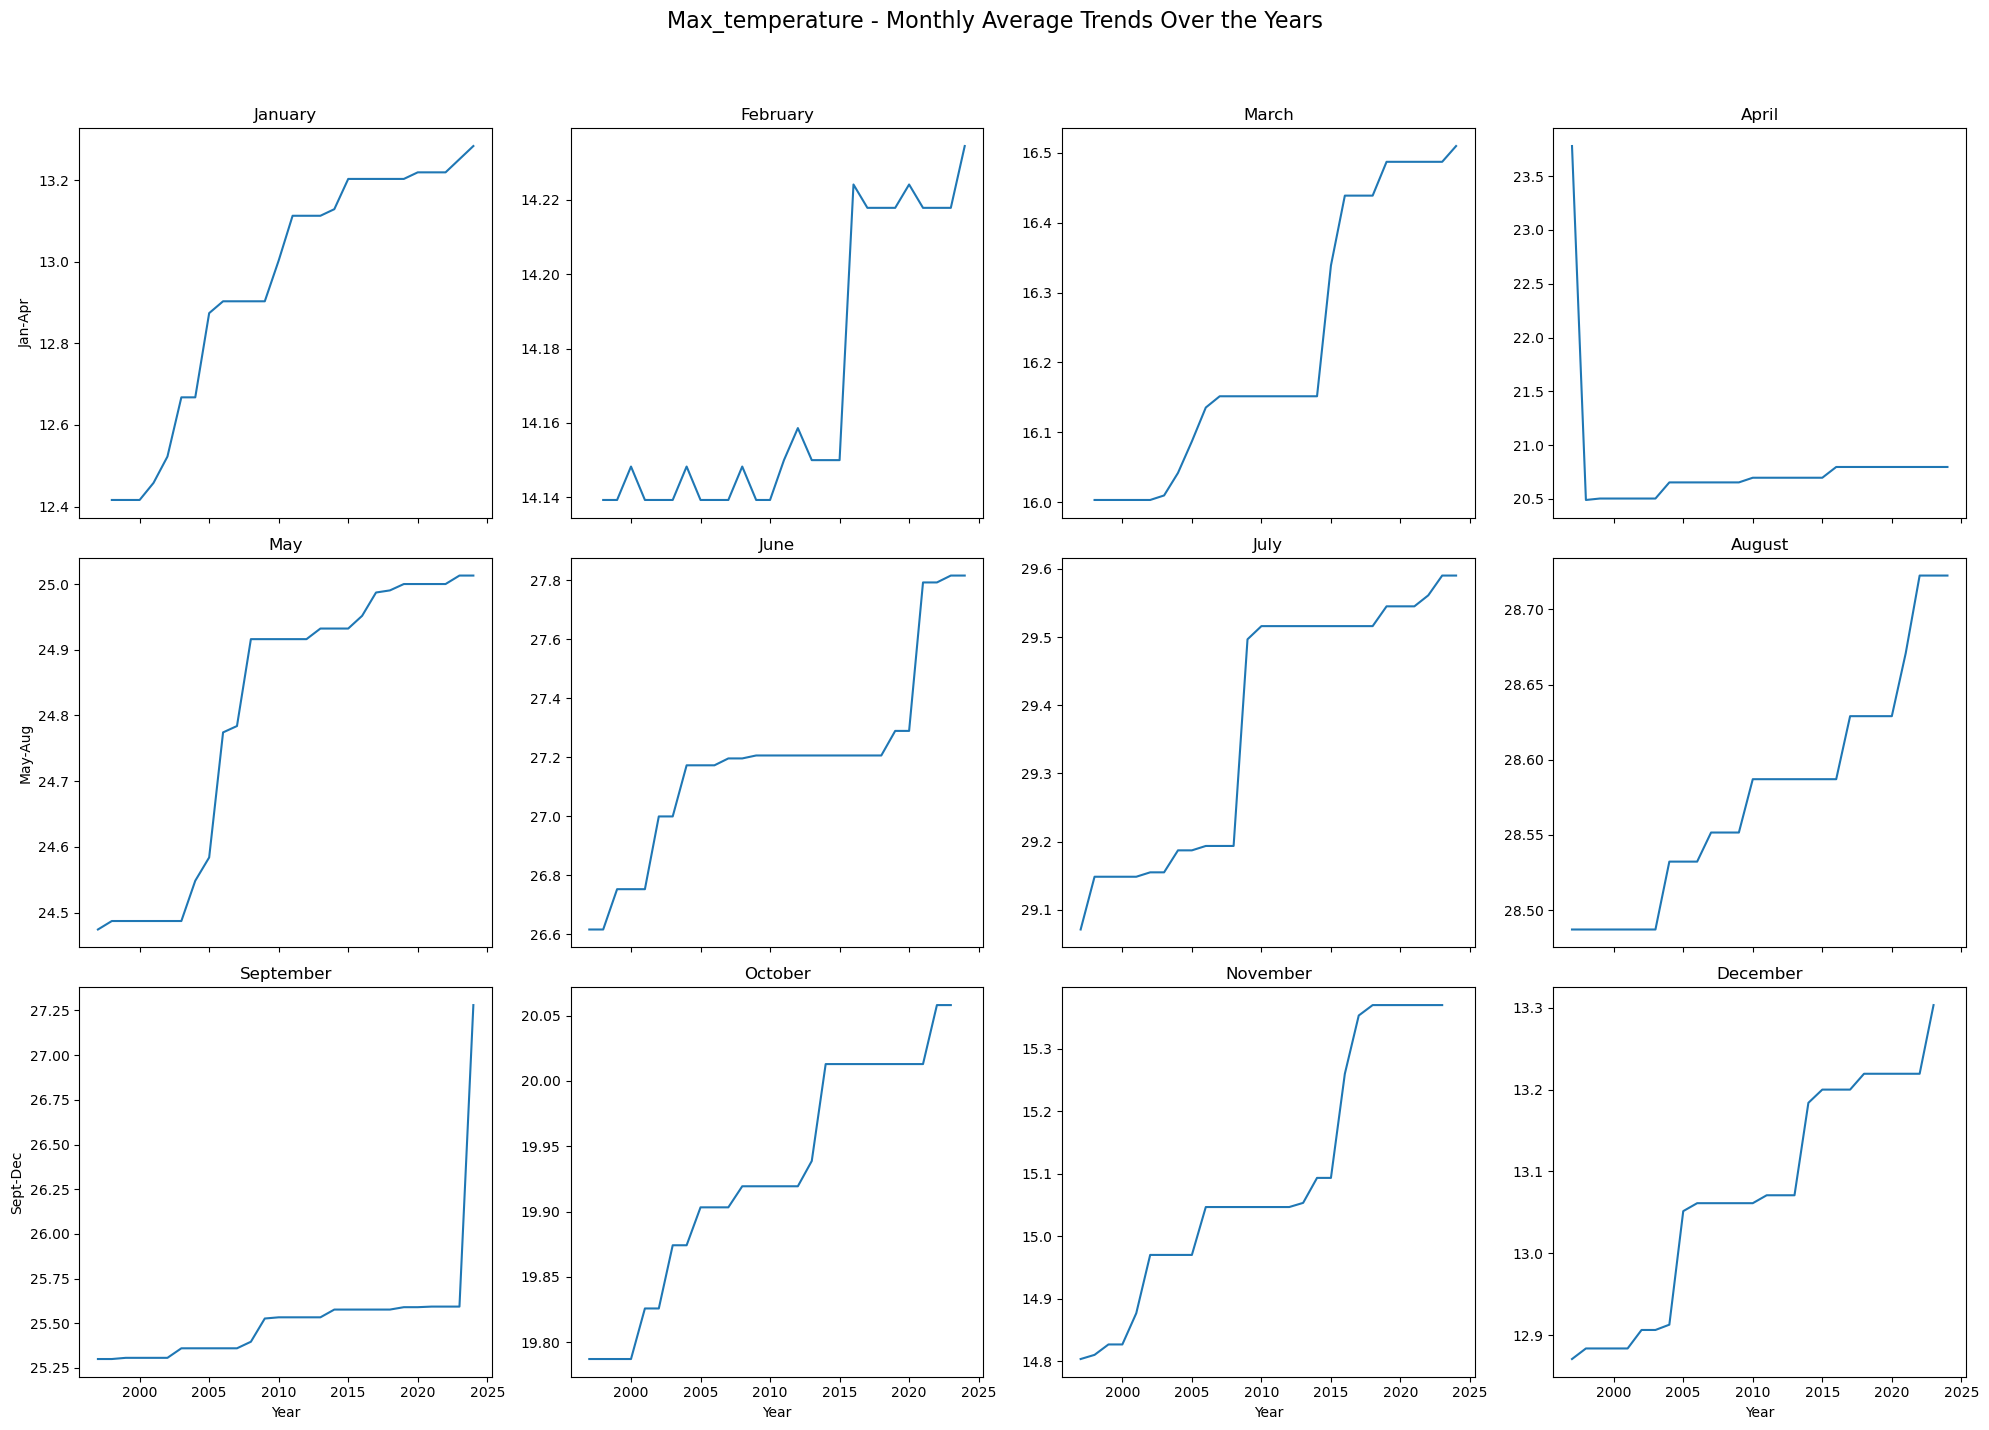

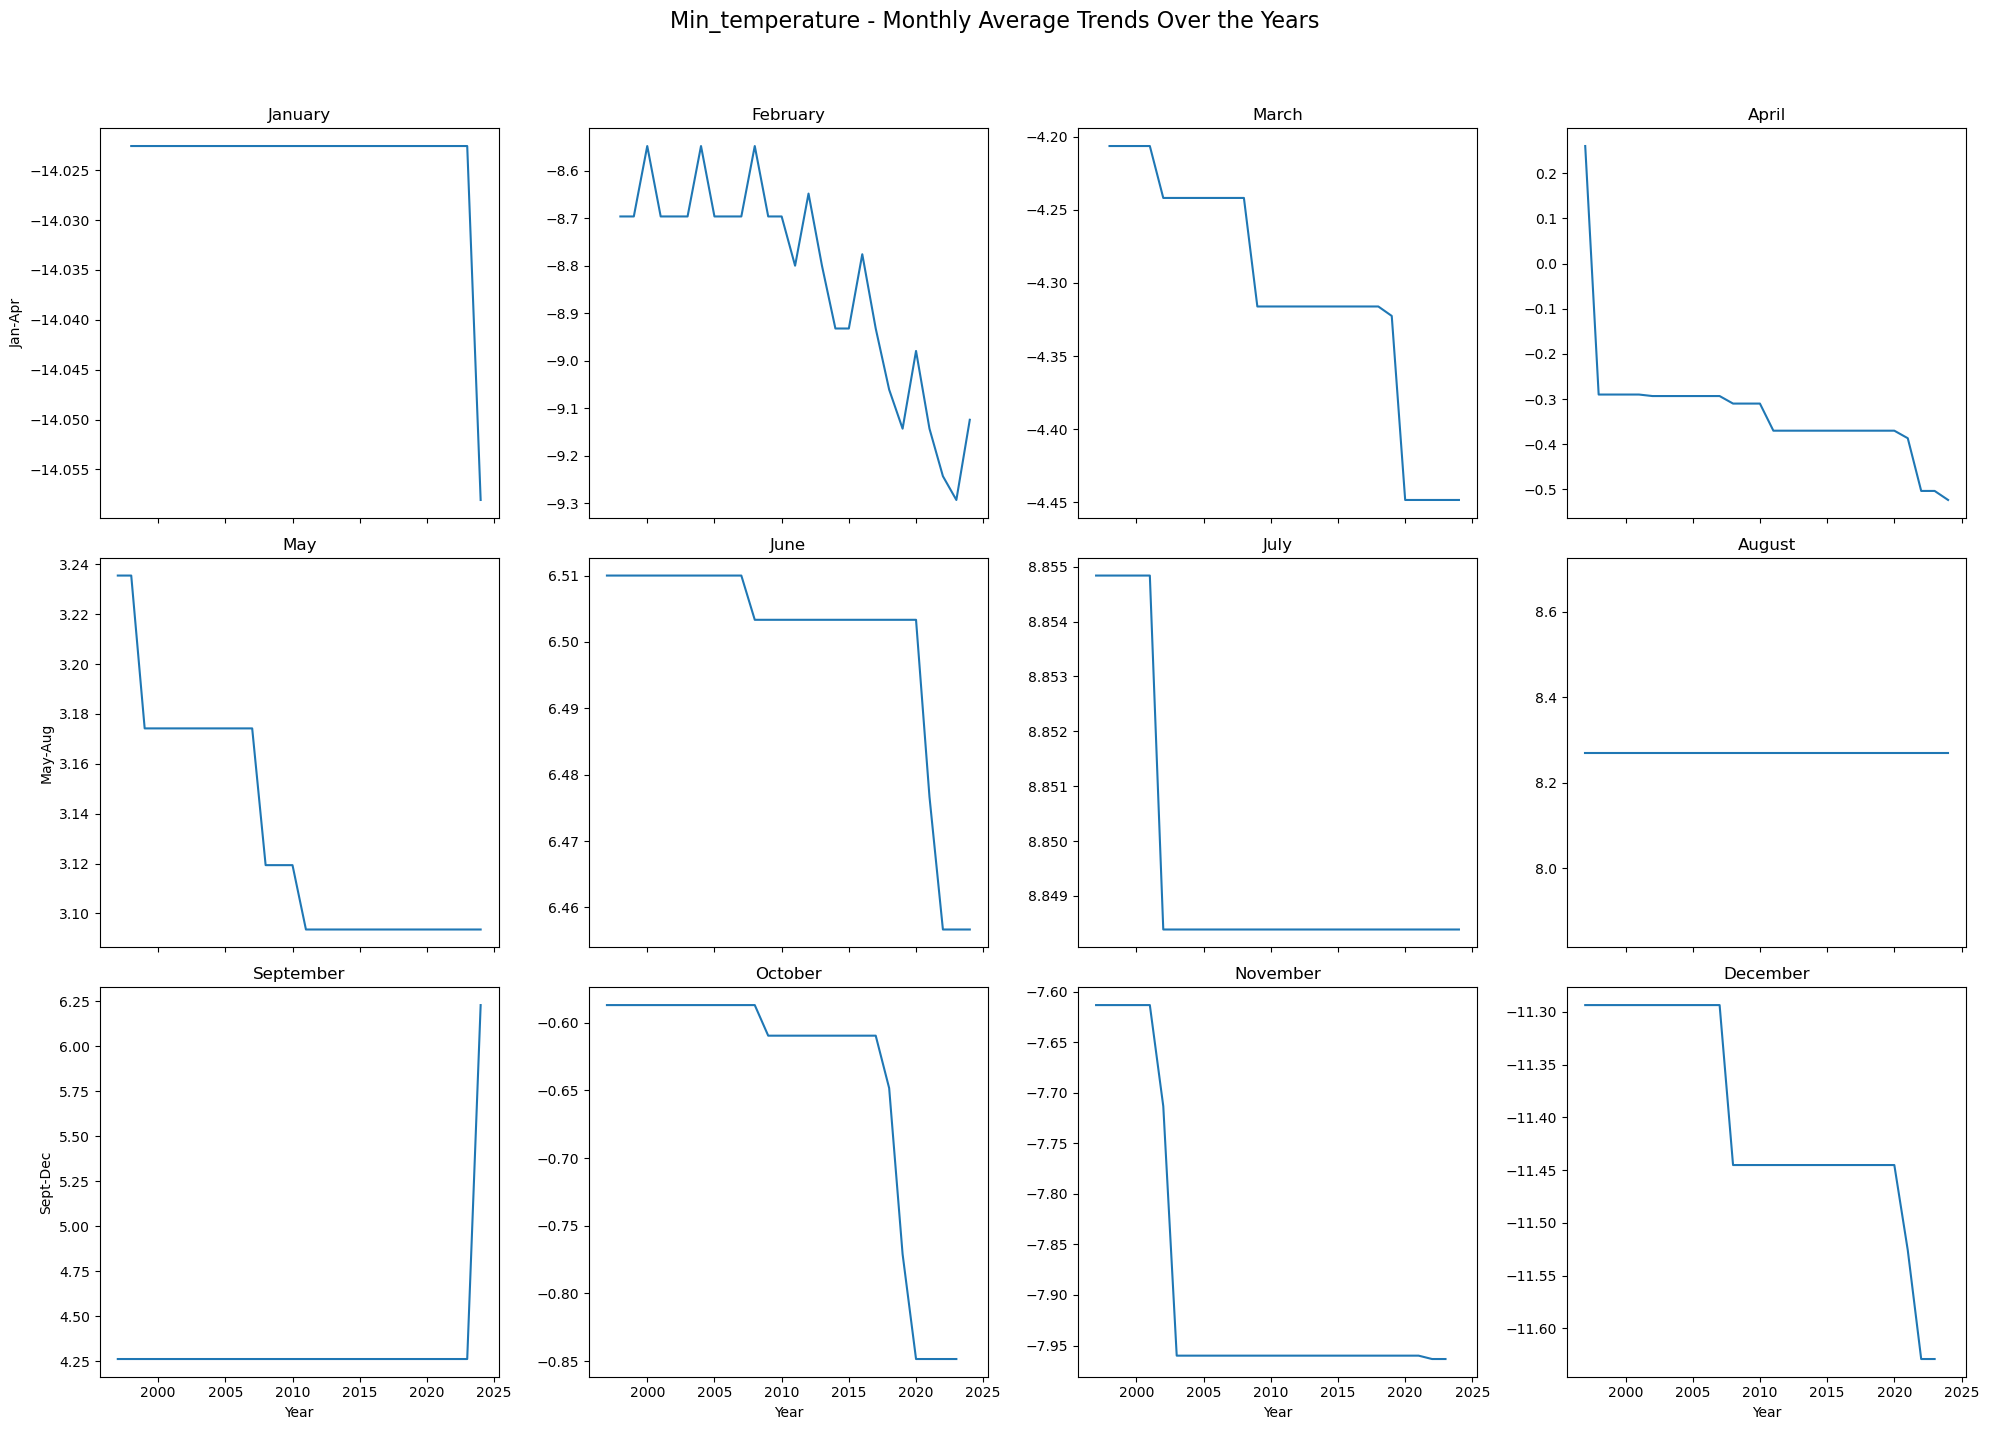

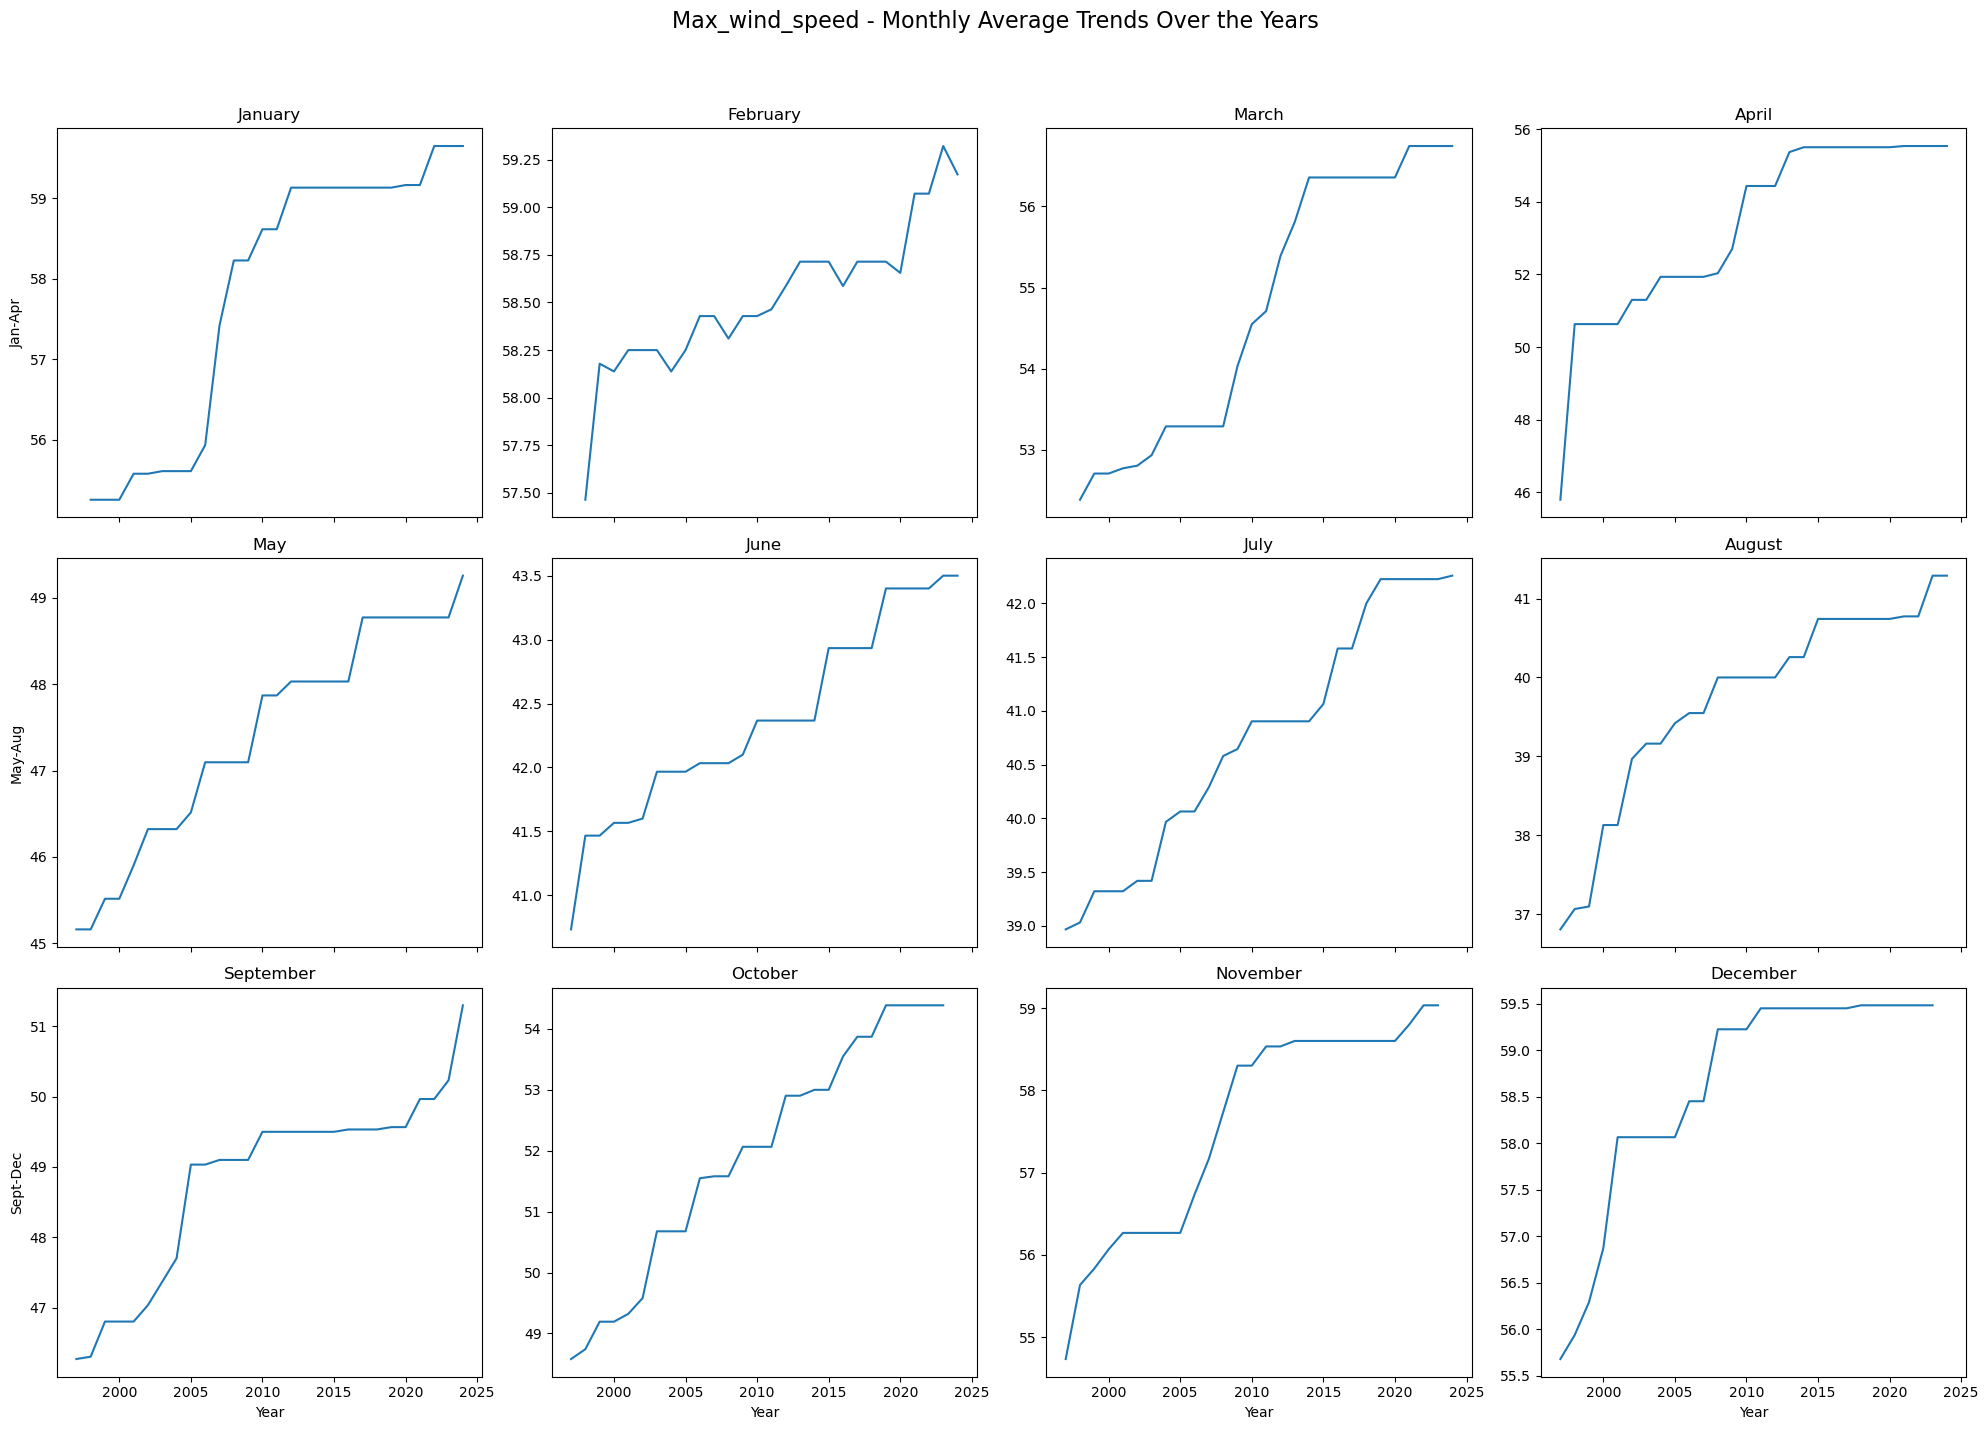

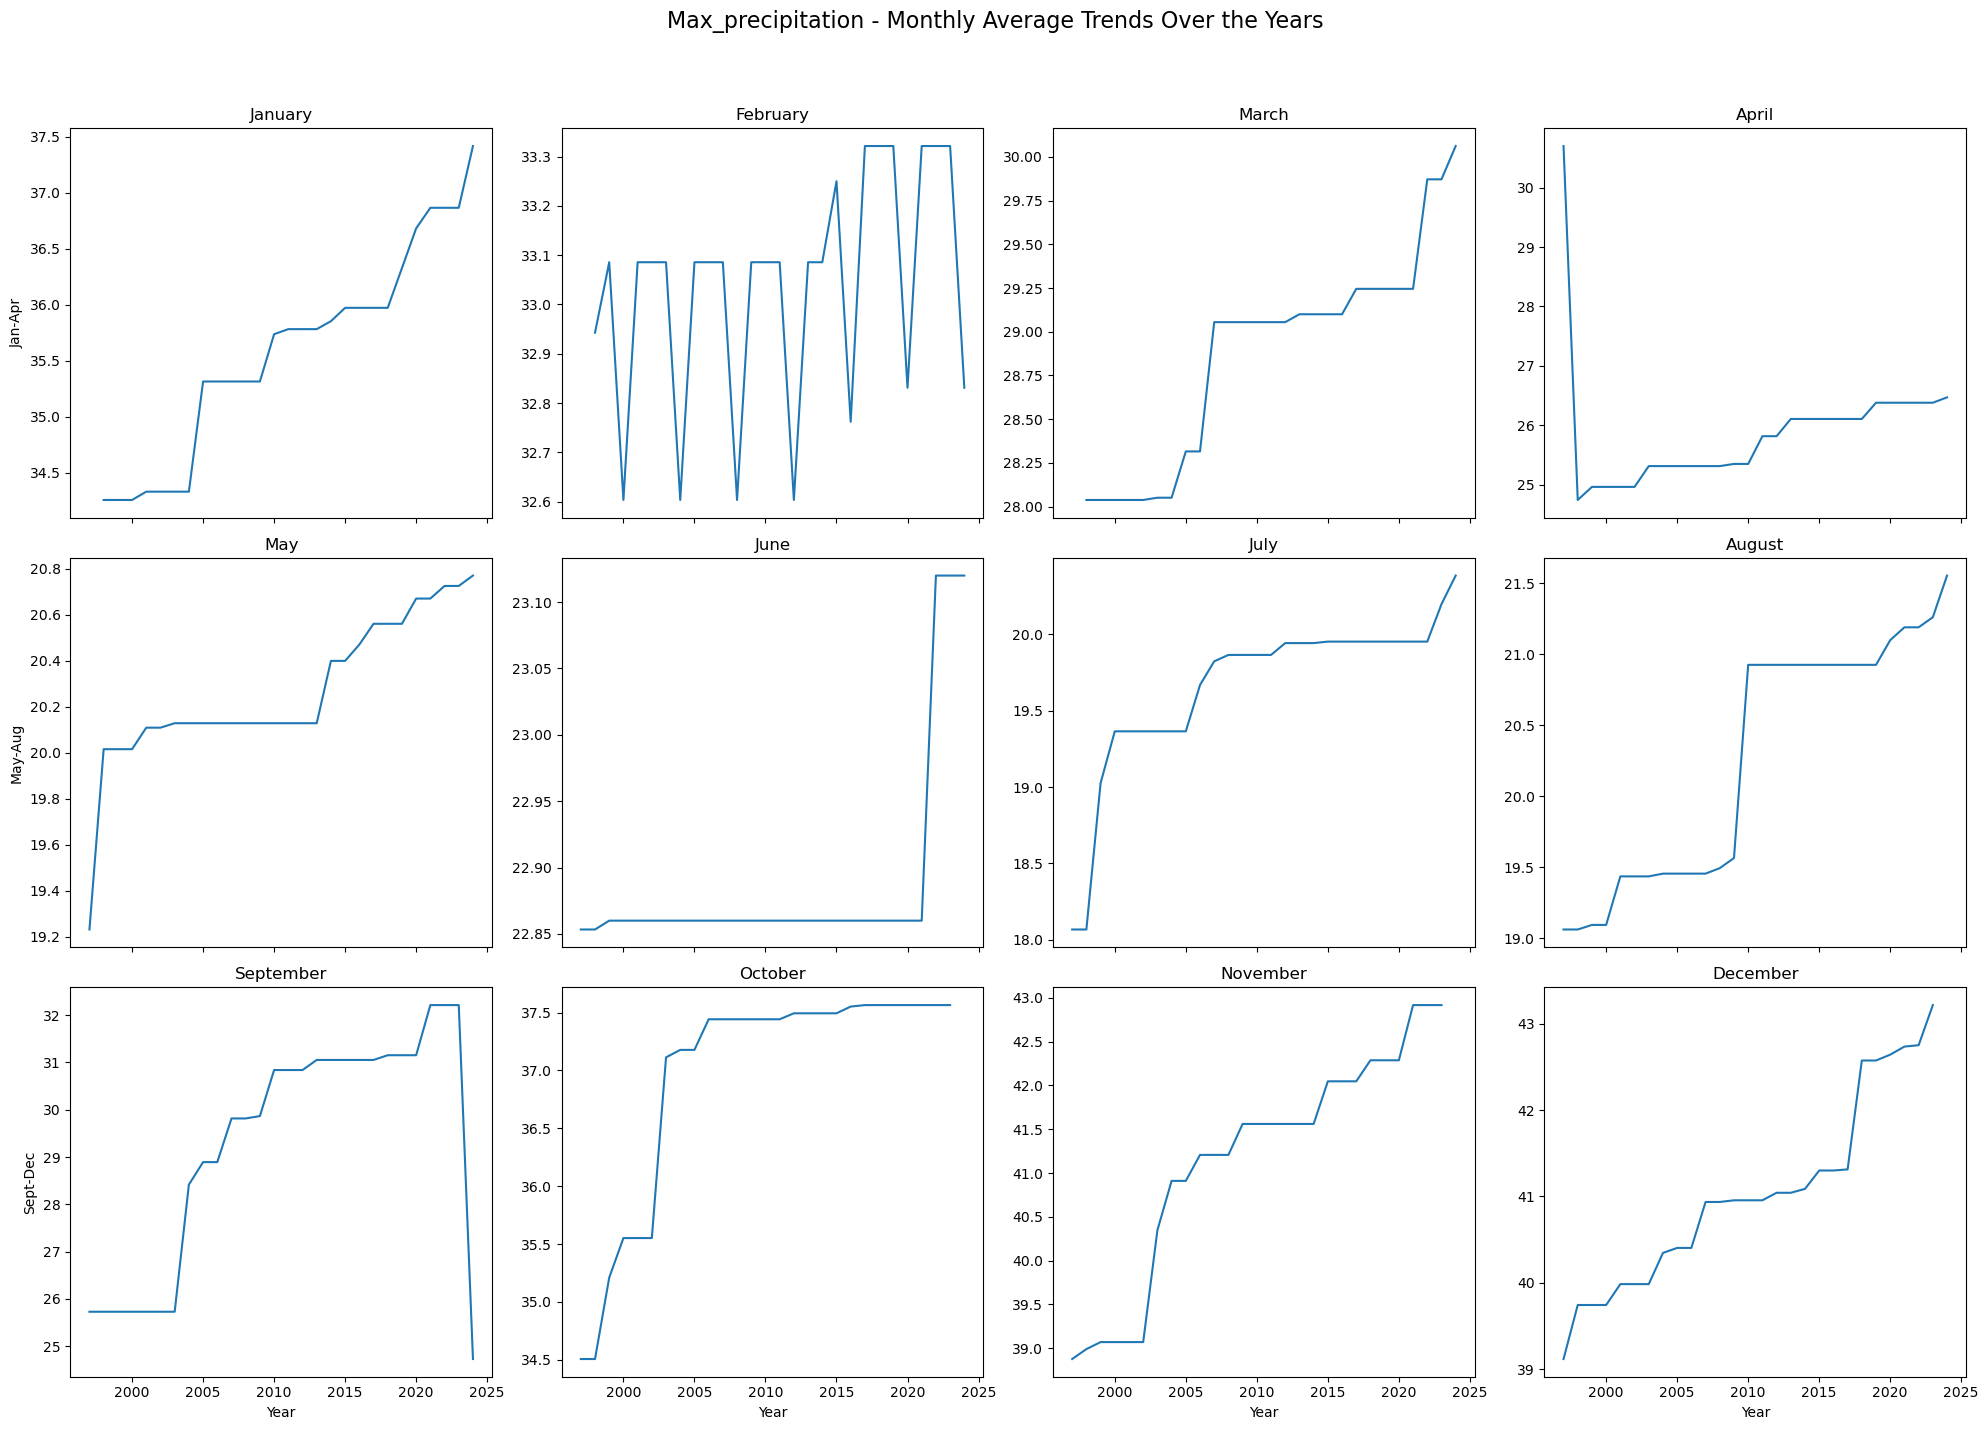

In [11]:
# Variables: max temperature, min temperature, max wind speed, max precipitation
# Extract month and year for grouping
ts_data['month'] = ts_data['date'].dt.month
ts_data['year'] = ts_data['date'].dt.year

variables = ['max_temperature', 'min_temperature','max_wind_speed','max_precipitation']

# Compute within-month averages for each variable
monthly_avg = ts_data.groupby(['year', 'month'])[variables].mean().reset_index()

# Time-Series Visualization by Month
month_groups = [(1, 4), (5, 8), (9, 12)]
month_labels = ['Jan-Apr', 'May-Aug', 'Sept-Dec']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, variable in enumerate(variables):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=False)
    fig.suptitle(f'{variable.capitalize()} - Monthly Average Trends Over the Years', fontsize=16)
    
    for row, (start_month, end_month) in enumerate(month_groups):
        for month in range(start_month, end_month + 1):
            ax = axes[row, month - start_month]
            monthly_data = monthly_avg[monthly_avg['month'] == month]
            ax.plot(monthly_data['year'], monthly_data[variable], label=f'{months[month - 1]}')
            ax.set_title(f'{months[month - 1]}')
            if row == 2:
                ax.set_xlabel('Year')
            if month == start_month:
                ax.set_ylabel(month_labels[row])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [ ]:
# Correlation Matrix

# Cleaning data with no NA values


cm = cm_data[variables].corr()

# Set figure size and color
fig, ax = plt.subplots(figsize=(12, 10))
plt.colorbar(ax.matshow(cm, cmap='coolwarm'))

# Set ticks to show variable names
ax.set_xticks(range(len(cm.columns)))
ax.set_yticks(range(len(cm.index)))
ax.set_xticklabels(cm.columns)
ax.set_yticklabels(cm.index)

# Add correlation coefficients
for i in range(len(cm.columns)):
    for j in range(len(cm.index)):
        ax.text(j, i, f'{cm.iloc[i, j]:.4f}', ha='center', va='center')

plt.title('Correlation Matrix of Weather Variables')
plt.show()


In [ ]:
# Create pairwise scatter plots for all selected variables with regression lines and calculate errors
fig, axes = plt.subplots(len(variables), len(variables), figsize=(20, 20))
fig.suptitle('Pairwise Scatter Plots of Weather Variables', fontsize=16)

all_outliers = pd.DataFrame()

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        ax = axes[i, j]
        if i != j:
            ax.scatter(cm_data[var2], cm_data[var1], alpha=0.3, s=5)

            # Add a regression line to indicate trend between variables
            if len(cm_data[var2]) > 1 and len(cm_data[var1]) > 1:
                
                # Calculate linear regression using numpy
                slope, intercept = np.polyfit(cm_data[var2], cm_data[var1], 1)
                regression_line = intercept + slope * cm_data[var2]
                ax.plot(cm_data[var2], regression_line, color='purple', lw=1)

                # Calculate and indicate the largest error (outlier) in each plot
                errors = np.abs(cm_data[var1] - regression_line)
                largest_error_idx = errors.idxmax()
                largest_error_points = cm_data.loc[[largest_error_idx]]
                ax.scatter(largest_error_points[var2], largest_error_points[var1], color='red', edgecolor='black', s=20, label='Largest Errors')

                # Indicate dates of largest errors
                for _, point in largest_error_points.iterrows():
                    ax.text(point[var2], point[var1], f"{point['date'].strftime('%Y-%m-%d')}", fontsize=8, color='black', ha='right')
                all_outliers = pd.concat([all_outliers, largest_error_points])
        else:
            ax.text(0.5, 0.5, var1, fontsize=12, ha='center', va='center', transform=ax.transAxes)
        if i == len(variables) - 1:
            ax.set_xlabel(var2.replace('_', ' ').title())
        if j == 0:
            ax.set_ylabel(var1.replace('_', ' ').title())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
dropped_all_outliers = all_outliers.drop_duplicates(subset='date', keep='first')
sorted_all_outliers = dropped_all_outliers.sort_values(by='date')
sorted_all_outliers

In [ ]:
# Define start and end years
start_year = 2000
end_year = 2024

# Create a DataFrame to store outliers
all_yearly_outliers = pd.DataFrame()

for year in range(start_year, end_year + 1):
    # Filter data for the specific year
    yearly_data = cm_data[(cm_data['date'] >= f'{year}-01-01') & (cm_data['date'] <= f'{year}-12-31')]
    
    if yearly_data.empty:
        continue

    for var1 in variables:
        for var2 in variables:
            if var1 != var2:
                # Calculate linear regression using numpy
                if len(yearly_data[var2]) > 1 and len(yearly_data[var1]) > 1:
                    slope, intercept = np.polyfit(yearly_data[var2], yearly_data[var1], 1)
                    regression_line = intercept + slope * yearly_data[var2]

                    # Calculate and indicate the largest error (outlier) in each plot
                    errors = np.abs(yearly_data[var1] - regression_line)
                    largest_error_idx = errors.idxmax()
                    largest_error_points = yearly_data.loc[[largest_error_idx]]

                    # Indicate dates of largest errors
                    all_yearly_outliers = pd.concat([all_yearly_outliers, largest_error_points])

# Drop duplicate outliers and sort them by date
dropped_all_outliers = all_yearly_outliers.drop_duplicates(subset='date', keep='first')
sorted_all_outliers = dropped_all_outliers.sort_values(by='date')

# Plot monthly average trends over the years for each variable
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_groups = [(1, 4), (5, 8), (9, 12)]
month_labels = ['Jan-Apr', 'May-Aug', 'Sep-Dec']

cm_data['year'] = cm_data['date'].dt.year
cm_data['month'] = cm_data['date'].dt.month
monthly_avg = cm_data.groupby(['year', 'month'])[variables].mean().reset_index()

for i, variable in enumerate(variables):
    fig, axes = plt.subplots(3, 4, figsize=(20, 15), sharex=True, sharey=False)
    fig.suptitle(f'{variable.capitalize()} - Monthly Average Trends Over the Years', fontsize=16)
    
    for row, (start_month, end_month) in enumerate(month_groups):
        for month in range(start_month, end_month + 1):
            ax = axes[row, month - start_month]
            monthly_data = monthly_avg[monthly_avg['month'] == month]
            ax.scatter(monthly_data['year'], monthly_data[variable], label=f'{months[month - 1]}', alpha=0.6)
            ax.set_title(f'{months[month - 1]}')
            if row == 2:
                ax.set_xlabel('Year')
            if month == start_month:
                ax.set_ylabel(month_labels[row])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Display the sorted outliers
sorted_all_outliers


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

features = ['max_dew_point', 'min_dew_point', 'min_temperature', 'max_humidex', 'max_wind_speed']
target = 'max_temperature'

X = cm_data[features]
y = cm_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score = model.score(X_test, y_test)
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const).fit()
se_coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Standard Error': ols_model.bse})
p_values = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'P-Value': ols_model.pvalues})
print(coefficients)
print(se_coefficients)
print(p_values)
print(r2_score)